In [29]:
import pickle
import matplotlib.pyplot as plt

In [51]:
with open('../Desktop/SNe_parameters.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [52]:
len(b)

91

In [4]:
(b[177][1])

IndexError: list index out of range

In [ ]:
CE_systems=[]
Collision_systems=[]
for i in range(len(b)):
    print('i',i)
    CE_system=[]
    Collision=[]
    for j in range(len(b[i][0])):
        if b[i][0][j]['event_flag'] == 7:
            #print(b[i][0][j]['event_flag'])
            CE_system.append([b[i][0],b[i][1]])
        if b[i][0][j]['event_flag'] == 9:
            #print(b[i][0][j]['event_flag'])
            Collision.append([b[i][0],b[i][1]])
        
    if len(CE_system) !=0:
        CE_systems.append(CE_system)
    if len(Collision) !=0:
        Collision_systems.append(Collision)

In [ ]:
len(CE_systems),len(Collision_systems)

In [ ]:
Collision_systems[1][0][1]

In [ ]:
q=[]
for i in range(len(b)):
    print('i',i)
    if i !=1:
        for j in range(len(b[i][0])):
            if b[i][0][j]['SNe_info'] == 2:
                print(b[i][0][j]['particles'][0].mass) 
                m1= b[i][0][j]['particles'][0].mass
                m2= b[i][0][j]['particles'][1].mass
                m3= b[i][0][j]['particles'][2].mass
                q.append(m3/(m1+m2))

In [ ]:
for i in range(len(b)):
    print('i',i)
    for j in range(len(b[i][0])):
        if b[i][0][j]['SNe_info'] == 2:
            print(b[i][0][j])

In [ ]:
binary=[]
q=[]
for i in range(len(b)):
    print('i',i)
    for j in range(len(b[i][0])):
        if b[i][0][j]['SNe_info'] == 2:
            if (b[i][0][j]['N_particles']) ==2:
                binary.append(b[i][1])
            elif (b[i][0][j]['N_particles']) >=3:
                print(b[i][0][j]['particles'][0].mass) 
                m1= b[i][0][j]['particles'][0].mass
                m2= b[i][0][j]['particles'][1].mass
                m3= b[i][0][j]['particles'][2].mass
                q.append(m3/(m1+m2))
            else:
                print('yay!, there is some weird system')

In [ ]:
binary_initial=[]
q_initial=[]
for i in range(len(b)):
    print('i',i)
    for j in range(len(b[i][0])):
        if b[i][0][j]['SNe_info'] == 2:
            if (b[i][0][j]['N_particles']) ==3:
                binary_initial.append(b[i][1])
            elif (b[i][0][j]['N_particles']) >3:
                print(b[i][0][0]['particles'][0].mass) 
                m1= b[i][0][0]['particles'][0].mass
                m2= b[i][0][0]['particles'][1].mass
                m3= b[i][0][0]['particles'][2].mass
                q_initial.append(m3/(m1+m2))
            else:
                print('Hoye!, there is some weird system')

In [ ]:
len(q_initial),len(binary_initial)

In [ ]:
plt.hist(q_initial,histtype='step')
plt.xlabel('q_initial')
plt.title('q_out_Moe')
plt.savefig('q_out_Moe')

In [53]:
binary=[]
q=[]
sm =[]
e=[]
PA=[]
sm_initial=[]
e_initial=[]
PA_initial=[]
mass1=[]
mass1_initial=[]
for i in range(len(b)):
    #print('i',i)
    for j in range(len(b[i][0])):
        if b[i][0][j]['SNe_info'] == 2:
            if (b[i][0][j]['N_particles']) ==2:
                binary.append(b[i][1])
            elif (b[i][0][j]['N_particles']) >=3:
                if (b[i][0][j-1]['binary_index']) != -1:
                    #print(b[i][0][j-1])
                    b_i = (b[i][0][j-1]['binary_index'])
                    for k in range(b[i][0][j]['N_particles']):
                        if  b[i][0][j-1]['particles'][k].index == b_i:
                            sms =b[i][0][j-1]['particles'][k].a
                            es =b[i][0][j-1]['particles'][k].e
                            sm.append(sms)
                            e.append(b[i][0][j-1]['particles'][k].e)
                            PA.append(sms*(1-es))
                            sms_i =b[i][0][0]['particles'][k].a
                            es_i =b[i][0][0]['particles'][k].e
                            sm_initial.append(sms_i)
                            e_initial.append(es_i)
                            PA_initial.append(sms_i*(1-es_i))
                            m1 = b[i][0][j-1]['particles'][k].child1.mass
                            m2 = b[i][0][j-1]['particles'][k].child2.mass
                            if m1>=m2:
                                mass1.append(m1)
                            else:
                                mass1.append(m2)
                            m1_i = b[i][0][0]['particles'][k].child1.mass
                            m2_i = b[i][0][0]['particles'][k].child2.mass
                            if m1_i>=m2_i:
                                mass1_initial.append(m1)
                            else:
                                mass1_initial.append(m2)
                            
                            
len(sm),len(e)

(31, 31)

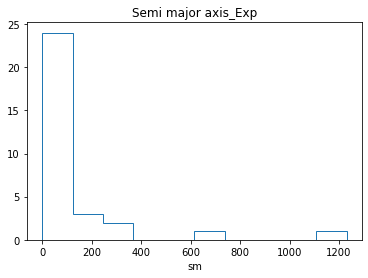

In [54]:
plt.hist(sm,histtype='step')
plt.xlabel('sm')
plt.title('Semi major axis_Exp')
plt.savefig('Semi_major_axis_Exp')

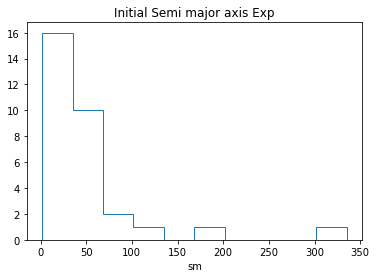

In [55]:
plt.hist(sm_initial,histtype='step')
plt.xlabel('sm')
plt.title('Initial Semi major axis Exp')
plt.savefig('Initial_Semi_major_axis_Exp')

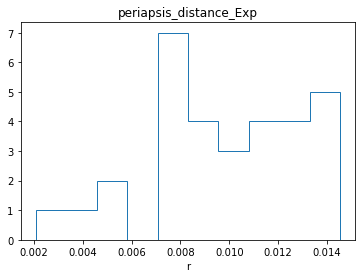

In [56]:
plt.hist(PA,histtype='step')
plt.xlabel('r')
plt.title('periapsis_distance_Exp')
plt.savefig('periapsis_distance_Exp')

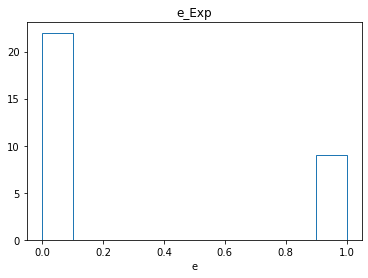

In [57]:
plt.hist(e,histtype='step')
plt.xlabel('e')
plt.title('e_Exp')
plt.savefig('e_Exp')

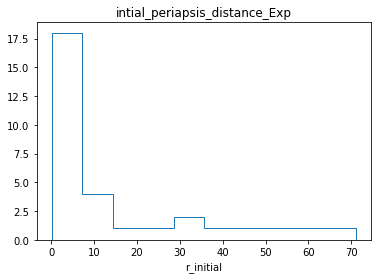

In [58]:
plt.hist(PA_initial,histtype='step')
plt.xlabel('r_initial')
plt.title('intial_periapsis_distance_Exp')
plt.savefig('initial_periapsis_distance_Exp')

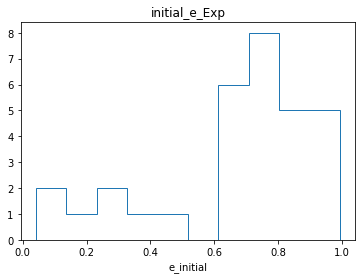

In [59]:
plt.hist(e_initial,histtype='step')
plt.xlabel('e_initial')
plt.title('initial_e_Exp')
plt.savefig('initial_e_Exp')

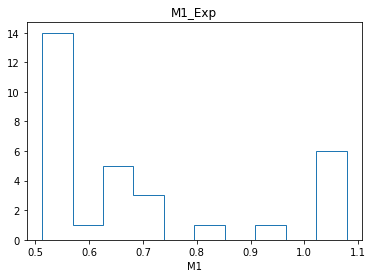

In [60]:
plt.hist(mass1,histtype='step')
plt.xlabel('M1')
plt.title('M1_Exp')
plt.savefig('M1_Exp')

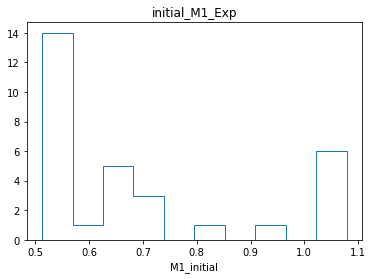

In [61]:
plt.hist(mass1_initial,histtype='step')
plt.xlabel('M1_initial')
plt.title('initial_M1_Exp')
plt.savefig('initial_M1_Exp')